<a href="https://colab.research.google.com/github/Rabidgeek/mua/blob/main/MarleysUmbrellaAcademy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#!pip install gspread

In [1]:
# Import Libraries
# Google Drive authentication
from google.colab import auth
import gspread
from google.auth import default

# Essential libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from datetime import datetime, date
import pytz
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [2]:
# Authenticate to google
auth.authenticate_user()
creds, _ = default()
gc = gspread.authorize(creds)

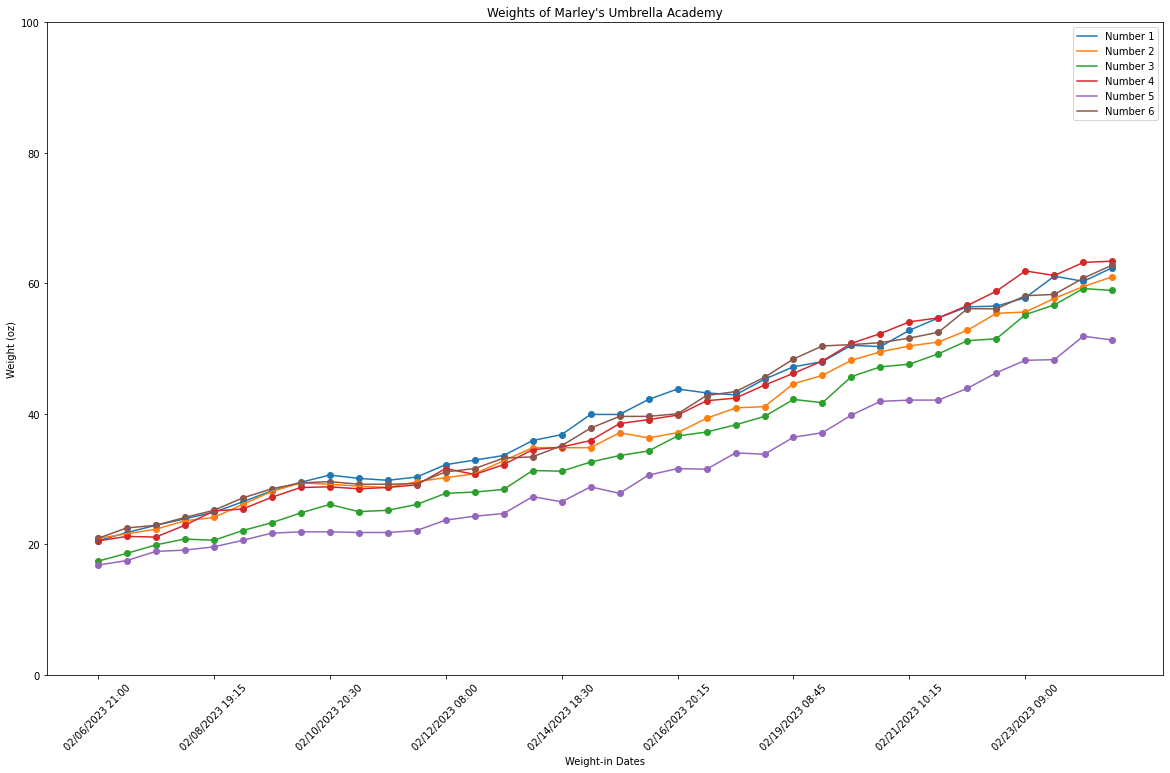

In [28]:
# Open the Marley's Umbrella Academy sheet
sheet = gc.open("Marley’s Umbrella Academy").sheet1

# Get the weight-in dates and the weights for each puppy
dates = sheet.col_values(1)[2:]
weights = [sheet.col_values(i)[2:] for i in range(2, 8)]

# Convert the weight strings to floats
weights = [[float(w) for w in puppy_weights] for puppy_weights in weights]

# Plot the weights
fig, ax = plt.subplots(figsize=(20, 12))
for i in range(6):
    ax.scatter(dates, weights[i])
    ax.plot(dates, weights[i], label=f"Number {i+1}")

# Set axis info
ax.set_ylim(0, 100)
ax.set_xlabel("Weight-in Dates")
ax.set_ylabel("Weight (oz)")
ax.set_title("Weights of Marley's Umbrella Academy")
ax.legend()

# Set the x-axis ticks to every 4th date
ax.xaxis.set_ticks(dates[::4])

# Format the tick labels to be rotated
ax.xaxis.set_tick_params(rotation=45)

plt.show()

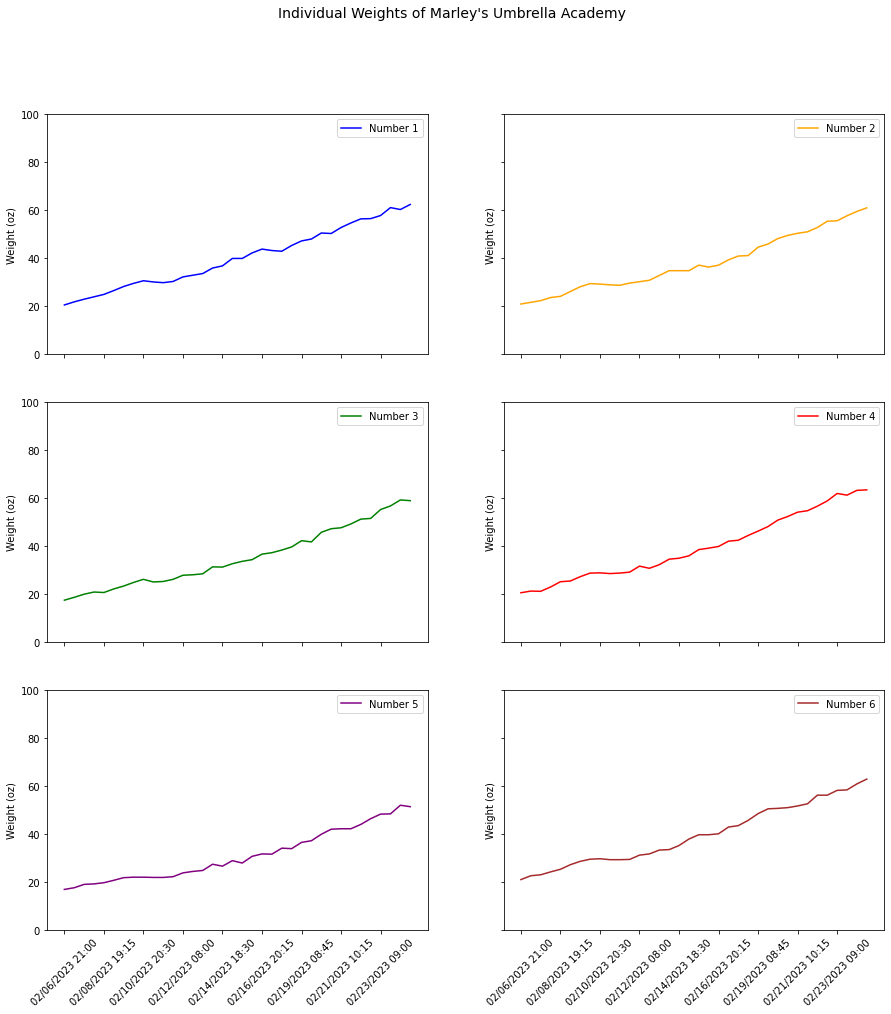

In [29]:
# Plot the weights as a scatter plot with a line connecting the data points
fig, axs = plt.subplots(3, 2, figsize=(15, 15), sharex=True, sharey=True)
fig.suptitle("Individual Weights of Marley's Umbrella Academy", fontsize=14)

# Define the colors for each puppy
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']

for i in range(6):
    row = i // 2
    col = i % 2
    axs[row, col].plot(dates, weights[i], label=f"Number {i+1}", color=colors[i])
    axs[row, col].set_ylim(0, 100)
    axs[row, col].set_ylabel("Weight (oz)")
    axs[row, col].legend()
    axs[row, col].xaxis.set_ticks(dates[::4])
    axs[row, col].tick_params(axis='x', rotation=45)

plt.show()

Prediction:
Target Feature = "adult_weight"
Engineer Feature = "age_weeks"

adult_weight = (pup weight / age in weeks) * 52

In [23]:
# Wrangle Function


# Assign values of rows
rows = sheet.get_all_values()

In [18]:
# Calculate age as datetime
def age_dt(born):
  # Assign and filter as timezone the birth dates of each pup
  born = datetime.strptime(born, '%m/%d/%Y %H:%M')
  # Assign and format today's date and time as datetime with timezone = PST
  today = datetime.now(pytz.timezone('US/Pacific'))
  today_mod = today.strftime('%Y-%m-%d %H:%M:%S')
  today_final = datetime.strptime(today_mod, '%Y-%m-%d %H:%M:%S')
  # Calculate each pup's age by subtracting today from birthdate
  result = today_final - born

  return result

age = age_dt(weights.iloc[-1][0])
recent_weight = weights.iloc[1][0]
print(f'{weights.columns[0]} is {age} hours:min:second old, and its latest weight is {recent_weight} oz.')


AttributeError: ignored

In [19]:
# Calculate age as string
def age(born):
  # Assign and filter as timezone the birth dates of each pup
  born = datetime.strptime(born, '%m/%d/%Y %H:%M')
  # Assign and format today's date and time as datetime with timezone = PST
  today = datetime.now(pytz.timezone('US/Pacific'))
  today_mod = today.strftime('%Y-%m-%d %H:%M:%S')
  today_final = datetime.strptime(today_mod, '%Y-%m-%d %H:%M:%S')
  # Calculate each pup's age by subtracting today from birthdate
  result = today_final - born

  return str(result)

# Assign each birthday to a variable
num1 = age(weights.iloc[-1][0])
num2 = age(weights.iloc[-1][1])
num3 = age(weights.iloc[-1][2])
num4 = age(weights.iloc[-1][3])
num5 = age(weights.iloc[-1][4])
num6 = age(weights.iloc[-1][5])

AttributeError: ignored

In [ ]:
# Insert age in row below column name
age_row = pd.DataFrame({
    'Number 1':num1,
    'Number 2':num2,
    'Number 3':num3,
    'Number 4':num4,
    'Number 5':num5,
    'Number 6':num6},
    index=[0])
weights = pd.concat([age_row, weights.loc[:]])

In [12]:
weights.head()

,Number 1,Number 2,Number 3,Number 4,Number 5,Number 6
0,"19 days, 22:47:05","19 days, 22:33:05","19 days, 22:22:05","19 days, 22:02:05","19 days, 21:20:05","19 days, 21:20:05"
2023-02-24 21:45:00,62.4,61.0,58.9,63.4,51.3,62.8
2023-02-24 10:00:00,60.3,59.5,59.2,63.2,51.9,60.8
2023-02-23 20:30:00,61.1,57.7,56.7,61.2,48.3,58.3
2023-02-23 09:00:00,57.8,55.6,55.2,61.9,48.2,58.1


In [13]:
# Loop to find age of each pup in a list of dictionary values
pups = []
for i in range(6):
  pups_age = {'Number ' + str(i+1):age(weights.iloc[-1][i])}
  pups.append(pups_age.copy())

print(pups)

[{'Number 1': '19 days, 22:47:08'}, {'Number 2': '19 days, 22:33:08'}, {'Number 3': '19 days, 22:22:08'}, {'Number 4': '19 days, 22:02:08'}, {'Number 5': '19 days, 21:20:08'}, {'Number 6': '19 days, 21:20:08'}]
